In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

In [168]:
# https://data.wprdc.org/dataset/property-assessments/resource/f2b8d575-e256-4718-94ad-1e12239ddb92
pr_val = pd.read_csv('assessments.csv',low_memory=False)

## Exploratory Analysis

In [169]:
# Statistics of the Data
#print(pr_val.columns)
#print("Shape of the dataframe: "+str(pr_val.shape))
#print(pr_val.describe)
#print(pr_val.isnull().sum())

It can be observed that not all 86 features are relevant for the prediction purposes. Also the data contains several NAN values and thus requires additional processing.

## Retain the necessary columns

This was done after literature survey and by analyzing the data. The data had many columns which conveyed the same information as some other column, in a different manner. In addition, the data also had several columns which were added/subtracted to get a single column. Therefore, these columns did not contribute additional information and was omitted from the dataframe.

In [170]:
col_to_keep=['SALEPRICE','PROPERTYSTATE','HEATINGCOOLINGDESC','BEDROOMS','TOTALROOMS',\
             'PROPERTYADDRESS','BASEMENT','PROPERTYCITY','DEEDBOOK','STYLE','CDUDESC','CONDITIONDESC',\
             'FULLBATHS','FIREPLACES','FINISHEDLIVINGAREA','HOMESTEADFLAG','LOTAREA','GRADE']

pr_val_cleaned = pr_val[col_to_keep]

In [171]:
pr_val_clean = pr_val_cleaned.dropna(how='any')

cdu_cond_mapping = {'EXCELLENT':8,'VERY GOOD':7,'GOOD':6,'FAIR':5,'AVERAGE':4,'POOR':3,'VERY POOR':2,'UNSOUND':1}
pr_val_clean['CDUDESC'] = pr_val_clean['CDUDESC'].map(cdu_cond_mapping)
pr_val_clean['CONDITIONDESC'] = pr_val_clean['CONDITIONDESC'].map(cdu_cond_mapping)

In [172]:
unique_properties = pr_val_clean['HEATINGCOOLINGDESC'].unique()

heat_cool_mapping = {'Central Heat with AC':15,'Heat Pump with AC':14,'Electric Heat with AC':13,'Unit Furnace with AC':12,\
                 'Floor Furnace with AC':11,'Wall Furnace with AC':10,'Central Heat':9,'Heat Pump':8,'Electric':7,\
                 'Unit Heat':6,'Floor Furnace':5,'Wall Furnace':4,'Other':3,'No heat but with AC':2,'None':1}

pr_val_clean['HEATINGCOOLINGDESC'] = pr_val_clean['HEATINGCOOLINGDESC'].map(heat_cool_mapping)

In [173]:
pr_val_tmp = pr_val_clean.copy()

if pr_val_clean['PROPERTYSTATE'].unique()=='PA':
    pr_val_clean = pr_val_tmp.drop(['PROPERTYSTATE'],axis=1)
else:
    pr_val_clean = pr_val_tmp[pr_val_tmp['PROPERTYSTATE']=='PA']
    pr_val_clean = pr_val_tmp.drop(['PROPERTYSTATE'],axis=1)
    


In [174]:
# One hot encoding of categorical variables
temp_df = pd.get_dummies(pr_val_clean['PROPERTYCITY']).astype(np.int64)
new_pr = pd.concat([pr_val_clean,temp_df],axis=1)
pr_df = new_pr.copy()

In [175]:
col_to_drop=['PROPERTYADDRESS','PROPERTYCITY','DEEDBOOK','STYLE']

if len(new_pr['HOMESTEADFLAG'].unique())==1:
    col_to_drop.append('HOMESTEADFLAG')
else:
    print('There are multiple unique values please check data')
    
try:
    pr_df = new_pr.drop(col_to_drop,axis=1)
except:
    print('An error has occured')


In [176]:
pr_df['GRADE'].unique()
grade_map={'XX+':21,'XX':20,'XX-':19,'X+':18,'X':17,'X-':16,'A+':15,'A':14,'A-':13,'B+':12,'B':11,'B-':10,\
           'C+':9,'C':8,'C-':7,'D+':6,'D':5,'D-':4,'E+':3,'E':2,'E-':1}

pr_df['GRADE'] = pr_df['GRADE'].map(grade_map)


In [177]:
pr_df = pr_df.dropna(how='any')

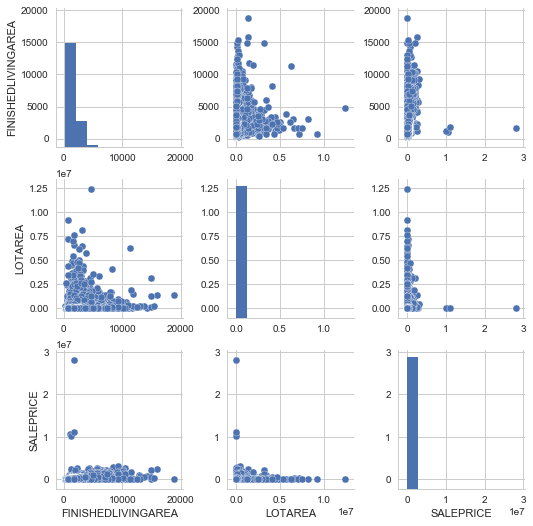

In [178]:
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols=['FINISHEDLIVINGAREA','LOTAREA','SALEPRICE']
sns.pairplot(pr_df[cols],size=2.5)
plt.show()


In [179]:
# the X matrix and Y matrix
y=pr_df.iloc[:,0].values
X=pr_df.iloc[:,1:].values

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_std=sc_x.fit_transform(X)

from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_std,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(X_train,Y_train)

print(slr.score(X_test,Y_test))


0.337390116635
